<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-to-test-basic-functionalities" data-toc-modified-id="Notebook-to-test-basic-functionalities-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook to test basic functionalities</a></span><ul class="toc-item"><li><span><a href="#Simple-backtests-with-and-without-transaction-costs" data-toc-modified-id="Simple-backtests-with-and-without-transaction-costs-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simple backtests with and without transaction costs</a></span><ul class="toc-item"><li><span><a href="#Without-transaction-costs" data-toc-modified-id="Without-transaction-costs-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Without transaction costs</a></span></li><li><span><a href="#With-transaction-costs" data-toc-modified-id="With-transaction-costs-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>With transaction costs</a></span></li></ul></li><li><span><a href="#Backtest-of-two-years,-using-2-different-combinations-of-MA-crossover" data-toc-modified-id="Backtest-of-two-years,-using-2-different-combinations-of-MA-crossover-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Backtest of two years, using 2 different combinations of MA crossover</a></span><ul class="toc-item"><li><span><a href="#Performance-of-each-year-individually:" data-toc-modified-id="Performance-of-each-year-individually:-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Performance of each year individually:</a></span></li><li><span><a href="#Performance-of-both-time-periods-together" data-toc-modified-id="Performance-of-both-time-periods-together-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Performance of both time periods together</a></span></li><li><span><a href="#Checking-'Strat_position'-and-'Costs'-of-last-days-of-year-1,-and-first-days-of-year-2" data-toc-modified-id="Checking-'Strat_position'-and-'Costs'-of-last-days-of-year-1,-and-first-days-of-year-2-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Checking 'Strat_position' and 'Costs' of last days of year 1, and first days of year 2</a></span></li></ul></li><li><span><a href="#Walk-forward-optimization." data-toc-modified-id="Walk-forward-optimization.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Walk forward optimization.</a></span><ul class="toc-item"><li><span><a href="#Checking-best-combination-is-well-picked-according-to-the-individual-SR-and-the-SR-of-its-neighbors" data-toc-modified-id="Checking-best-combination-is-well-picked-according-to-the-individual-SR-and-the-SR-of-its-neighbors-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Checking best combination is well picked according to the individual SR and the SR of its neighbors</a></span></li></ul></li><li><span><a href="#Analysis-of-Shorting-periods" data-toc-modified-id="Analysis-of-Shorting-periods-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Analysis of Shorting periods</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-returns-of-buying-vs-shorting-the-market" data-toc-modified-id="Distribution-of-returns-of-buying-vs-shorting-the-market-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Distribution of returns of buying vs shorting the market</a></span></li><li><span><a href="#Returns-when-shorting-the-market" data-toc-modified-id="Returns-when-shorting-the-market-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Returns when shorting the market</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li></ul></li></ul></div>

# Notebook to test basic functionalities

In [6]:
%run Functions.ipynb

In [1]:
# Settings for notebook visualization
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline
from IPython.core.display import HTML
HTML("""<style>.output_png img {display: block;margin-left: auto;margin-right: auto;text-align: center;vertical-align: middle;} </style>""")

In [2]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib as plt
import quantstats as qs
from datetime import datetime, timedelta
print("Libraries imported correctly")

Libraries imported correctly


In [3]:
# Settings for plot visualization
qs.extend_pandas()
plt.rcParams['figure.figsize'] = (20,6) # (26,12)

for_github = False
if for_github:
    color = 'k' # Color for GitHub
    plt.rcParams['legend.facecolor'] = 'w'# Color for GitHub
else:
    color = 'w' # Color for me
    plt.rcParams['legend.facecolor'] = '#2f3540' # Color for me

plt.rcParams['text.color'] = color
plt.rcParams['xtick.color'] = color
plt.rcParams['ytick.color'] = color
plt.rcParams['axes.labelcolor'] = color

SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIG_SIZE = 17
plt.rcParams['font.size'] = SMALL_SIZE
plt.rcParams['axes.titlesize'] = BIG_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = SMALL_SIZE
plt.rcParams['figure.titlesize'] = BIG_SIZE

np.set_printoptions(edgeitems=40, linewidth=1000)

pd.set_option("display.precision", 6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
print("Notebook parameters set correctly")

Notebook parameters set correctly


In [4]:
ini_equity = 100
commision = 2/130000 + 12.5/130000 #0.000111538462 # 0.001 = 0.1% of the daily return

In [7]:
data = get_sp500_data(from_local_file=True, save_to_file=False)
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,2520000


In [10]:
data['Close'].resample('D').ohcl()

AttributeError: 'DatetimeIndexResampler' object has no attribute 'ohcl'

In [5]:
full_df = get_sp500_data(from_local_file=True, save_to_file=False)
full_df = full_df[['Open', 'Close']]

date_fmt = '%Y-%m-%d'
from_date = '1950-01-01'
to_date = '2020-12-31'

first_day = datetime.strptime('2018-01-01', date_fmt)
last_day = datetime.strptime('2019-12-31', date_fmt)

data = full_df.loc[from_date:to_date].copy()
data['Market_daily_ret'] = data['Close'].pct_change().fillna((data['Close']-data['Open'])/data['Open'])

data = data[['Close', 'Open', 'Market_daily_ret']]

data.shape
data.head()

NameError: name 'get_sp500_data' is not defined

## Simple backtests with and without transaction costs

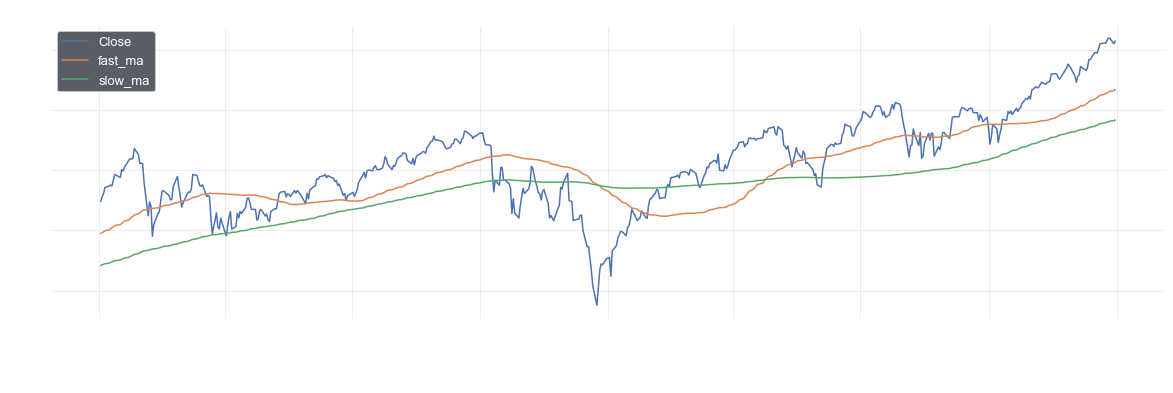

In [16]:
df = data.loc[first_day:last_day].copy()

df['fast_ma'] = full_df['Close'].rolling(window=75).mean()[first_day:last_day]
df['slow_ma'] = full_df['Close'].rolling(window=200).mean()[first_day:last_day]
df[['Close', 'fast_ma', 'slow_ma']].plot(title="SP500 with MAs of 75-200 (2018-2019)", figsize=(20,6))

### Without transaction costs

In [8]:
%run Functions.ipynb

Backtest without transaction costs: 


,Close,Market_daily_ret,Strat_position,Long_only,Costs,Strat_daily_ret,Market_cum_ret,Strat_cum_ret
Date,,,,,,,,
2018-01-02,2695.810059,0.008303,1,0,0,0.000000,100.830336,100.000000
2018-01-03,2713.060059,0.006399,1,0,0,0.006399,101.475531,100.639882


,Close,Market_daily_ret,Strat_position,Long_only,Costs,Strat_daily_ret,Market_cum_ret,Strat_cum_ret
Date,,,,,,,,
2018-12-21,2416.620117,-0.020588,1,0,0,-0.020588,90.387903,89.643560
2018-12-24,2351.100098,-0.027112,1,0,0,-0.027112,87.937283,87.213121
2018-12-26,2467.699951,0.049594,-1,0,0,0.049594,92.298422,91.538346
2018-12-27,2488.830078,0.008563,-1,0,0,-0.008563,93.088744,90.754533


,Close,Market_daily_ret,Strat_position,Long_only,Costs,Strat_daily_ret,Market_cum_ret,Strat_cum_ret
Date,,,,,,,,
2019-04-22,2907.969971,0.001012,-1,0,0,-0.001012,108.765671,77.286784
2019-04-23,2933.679932,0.008841,-1,0,0,-0.008841,109.727291,76.603476
2019-04-24,2927.250000,-0.002192,1,0,0,0.002192,109.486794,76.771372
2019-04-25,2926.169922,-0.000369,1,0,0,-0.000369,109.446397,76.743046


,Close,Market_daily_ret,Strat_position,Long_only,Costs,Strat_daily_ret,Market_cum_ret,Strat_cum_ret
Date,,,,,,,,
2019-12-30,3221.290039,-0.005781,1,0,0,-0.005781,120.48466,84.482998
2019-12-31,3230.780029,0.002946,1,0,0,0.002946,120.83961,84.731887


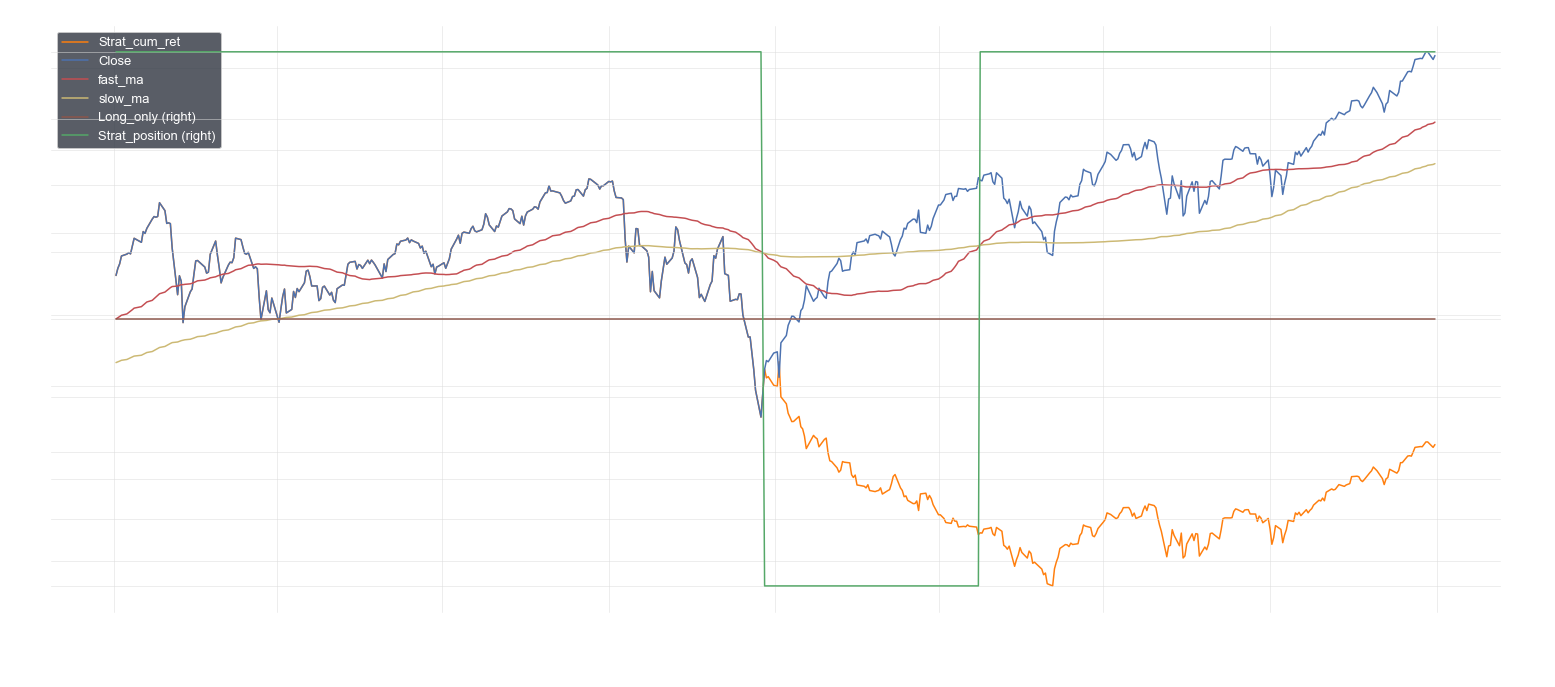

In [9]:
df = data.loc[first_day:last_day].copy()
print("Backtest without transaction costs: ")
_, _, _ = backtest_ma_strat(df, fast_ma=75, slow_ma=200, last_position=0, commision=0)
show_plot(df, start=first_day, end=last_day, norm=False, benchmark=True, position=True, fast_ma=75, slow_ma=200)

df.head(2)
df.loc['2018-12-21':'2018-12-27']
df.loc['2019-04-22':'2019-04-25']
df.tail(2)

### With transaction costs

In [10]:
full_df.loc['2018'].head(1)


,Close,Open
Date,,
2018-01-02,2695.810059,2683.72998


Backtest with transaction costs: 
Period: 2018-01-02 to 2019-12-31
	Overall return of SP500: 120.38 %. SR of SP500: 0.71
	Overall return of 75-200 MA crossover: 84.69 %. SR strategy: -0.48


,Close,Market_daily_ret,Strat_position,Long_only,Costs,Strat_daily_ret,Market_cum_ret,Strat_cum_ret
Date,,,,,,,,
2018-01-02,2695.810059,0.008303,1,0,0.000112,-0.000112,100.830336,99.988846
2018-01-03,2713.060059,0.006399,1,0,0.000000,0.006399,101.475531,100.628657
2019-12-31,3230.780029,0.002946,1,0,0.000000,0.002946,120.839610,84.685575


,Close,Market_daily_ret,Strat_position,Long_only,Costs,Strat_daily_ret,Market_cum_ret,Strat_cum_ret
Date,,,,,,,,
2018-12-21,2416.620117,-0.020588,1,0,0.000000,-0.020588,90.387903,89.633562
2018-12-24,2351.100098,-0.027112,1,0,0.000000,-0.027112,87.937283,87.203394
2018-12-26,2467.699951,0.049594,-1,0,0.000223,0.049371,92.298422,91.508683
2018-12-27,2488.830078,0.008563,-1,0,0.000000,-0.008563,93.088744,90.725124


,Close,Market_daily_ret,Strat_position,Long_only,Costs,Strat_daily_ret,Market_cum_ret,Strat_cum_ret
Date,,,,,,,,
2019-04-22,2907.969971,0.001012,-1,0,0.000000,-0.001012,108.765671,77.261739
2019-04-23,2933.679932,0.008841,-1,0,0.000000,-0.008841,109.727291,76.578652
2019-04-24,2927.250000,-0.002192,1,0,0.000223,0.001969,109.486794,76.729412
2019-04-25,2926.169922,-0.000369,1,0,0.000000,-0.000369,109.446397,76.701100


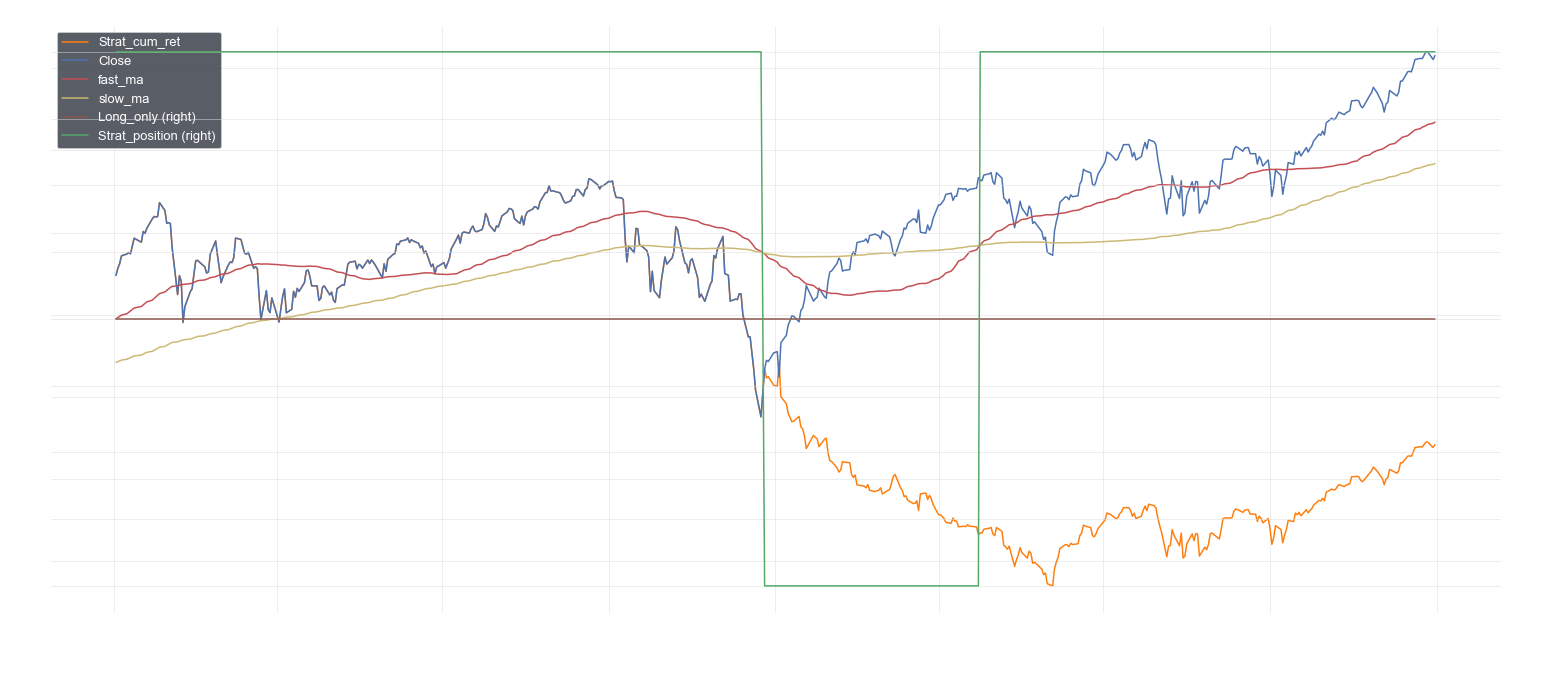

In [11]:
%run Functions.ipynb
df = data.loc[first_day:last_day].copy()
print("Backtest with transaction costs: ")
_, ret_strat, sr_strat = backtest_ma_strat(df, fast_ma=75, slow_ma=200, last_position=0, commision=commision)
show_plot(df, start=first_day, end=last_day, norm=False, benchmark=True, position=True, fast_ma=75, slow_ma=200)
print_backtest_stats(df, 75, 200, ret_strat, sr_strat)

df.iloc[[0,1,-1]]
df.loc['2018-12-21':'2018-12-27']
df.loc['2019-04-22':'2019-04-25']

## Backtest of two years, using 2 different combinations of MA crossover

### Performance of each year individually:
    ### 2018: Long only
    ### 2019: MAs 75-200

Period: 2018-01-02 to 2018-12-31
	Overall return of SP500: 93.41 %. SR of SP500: -0.29
	Overall return of long only: 93.41 %. SR strategy: -0.29
Period: 2019-01-02 to 2019-12-31
	Overall return of SP500: 130.43 %. SR of SP500: 2.10
	Overall return of 75-200 MA crossover: 94.24 %. SR strategy: -0.41


,Close,Market_daily_ret,Strat_daily_ret,Strat_position,Costs,Long_only,Market_cum_ret,Strat_cum_ret
Date,,,,,,,,
2019-12-30,3221.290039,-0.005781,-0.005781,1,0.0,0,128.499508,93.966805
2019-12-31,3230.780029,0.002946,0.002946,1,0.0,0,128.878070,94.243633


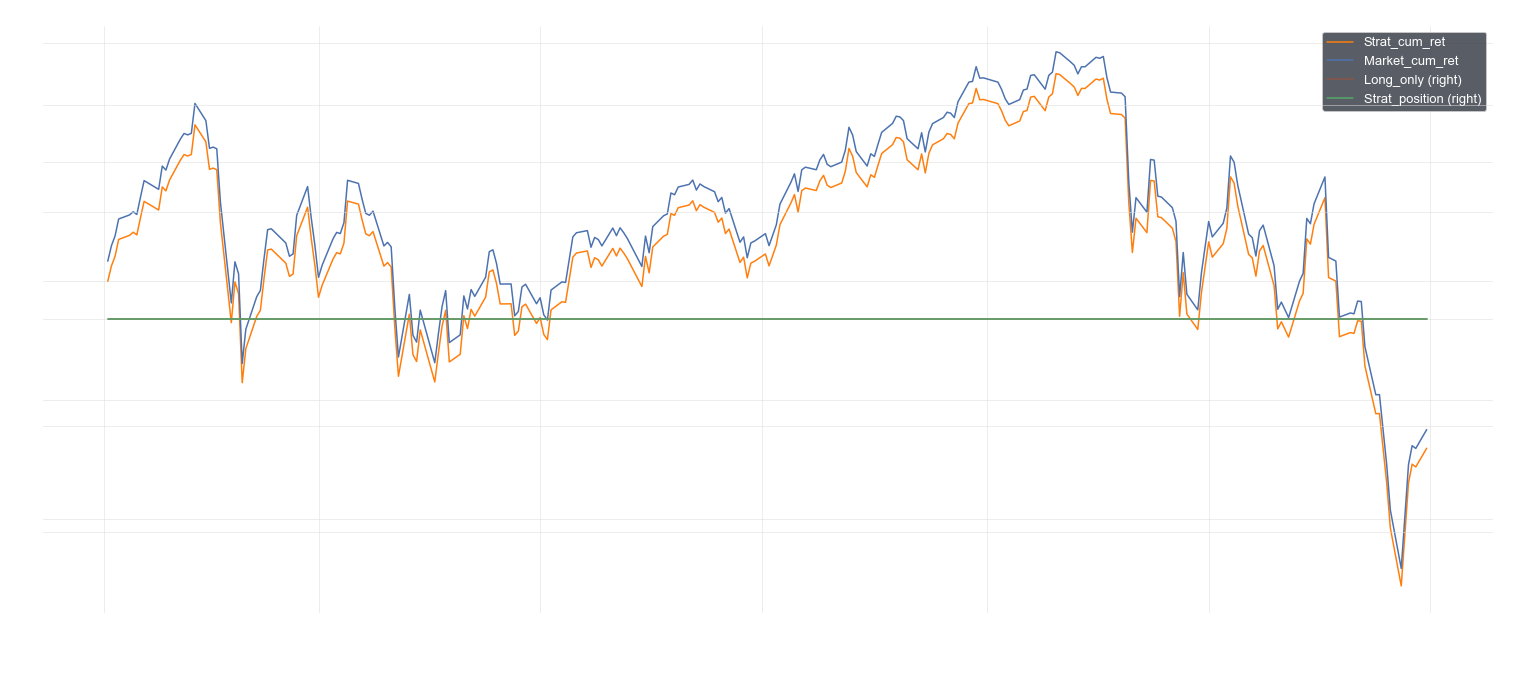

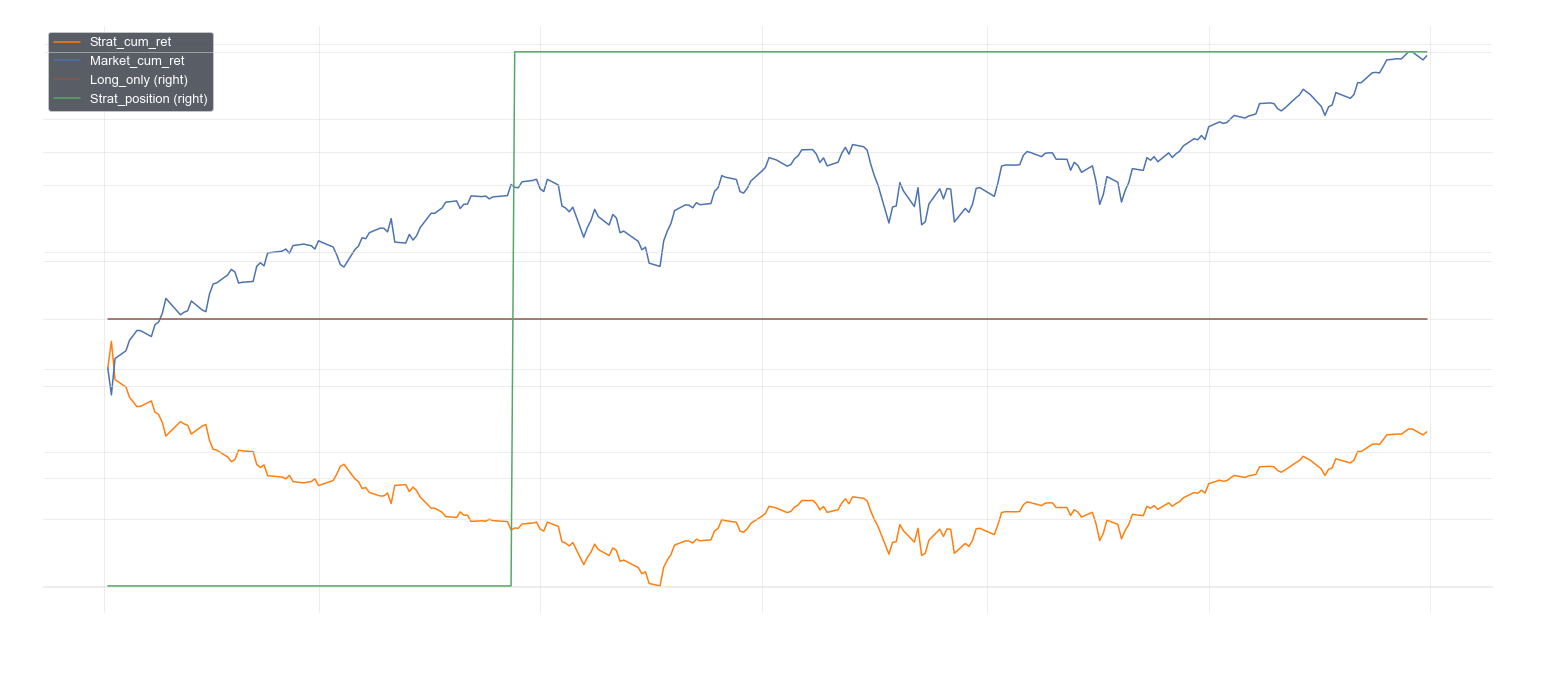

In [12]:
%run Functions.ipynb

df = data[first_day:last_day].copy()
tmp_df = pd.DataFrame()

cols = ['Strat_daily_ret', 'Strat_position', 'Costs', 'Long_only', 'Market_cum_ret', 'Strat_cum_ret']
one_day = pd.tseries.offsets.BusinessDay(n=1)
df_year_1 = df.loc[str(first_day.year)].copy()
df_year_2 = df.loc[str(last_day.year)].copy()

#  Get returns of each strategy for each year
ma_backtest_print_plot(df_year_1, last_position=0)
last_position = df_year_1.loc[df_year_1.index[-1], 'Strat_position']

ma_backtest_print_plot(df_year_2, last_position=last_position, fast_ma=75, slow_ma=200)

tmp_df = pd.concat([df_year_1, df_year_2], axis=0)

#  Add all obtained columns in the original df
df = pd.concat([df, tmp_df[cols]], axis=1)
df.tail(2)

### Performance of both time periods together

	Period: 2018-01-02 to 2019-12-31
	Overall return of SP500: 120.84 %. SR of SP500: 0.71
	Overall return of our strategy: 87.63 %. Sharpe ratio strategy: -0.37


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a23d2b810>, <matplotlib.axes._subplots.AxesSubplot object at 0x1a2420a8d0>, <matplotlib.axes._subplots.AxesSubplot object at 0x1a24243a10>], dtype=object)

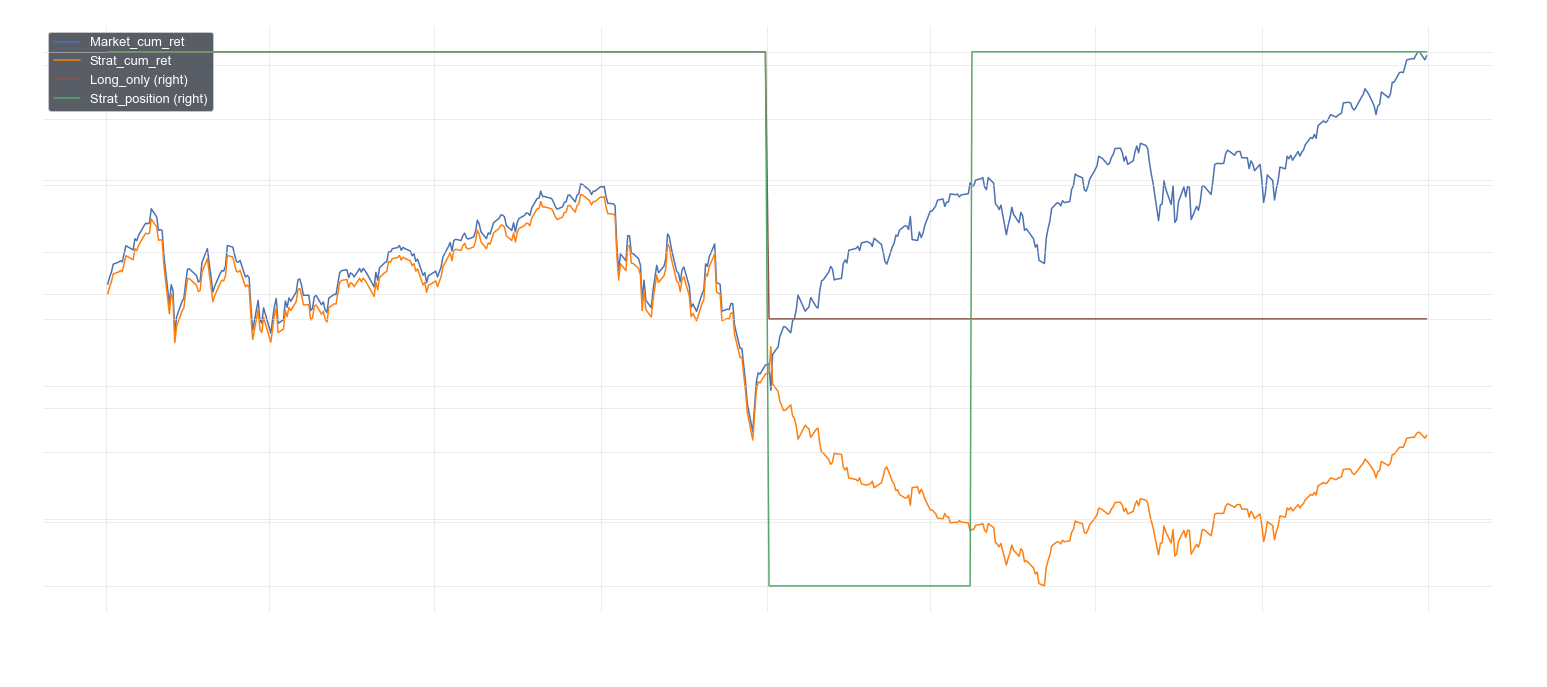

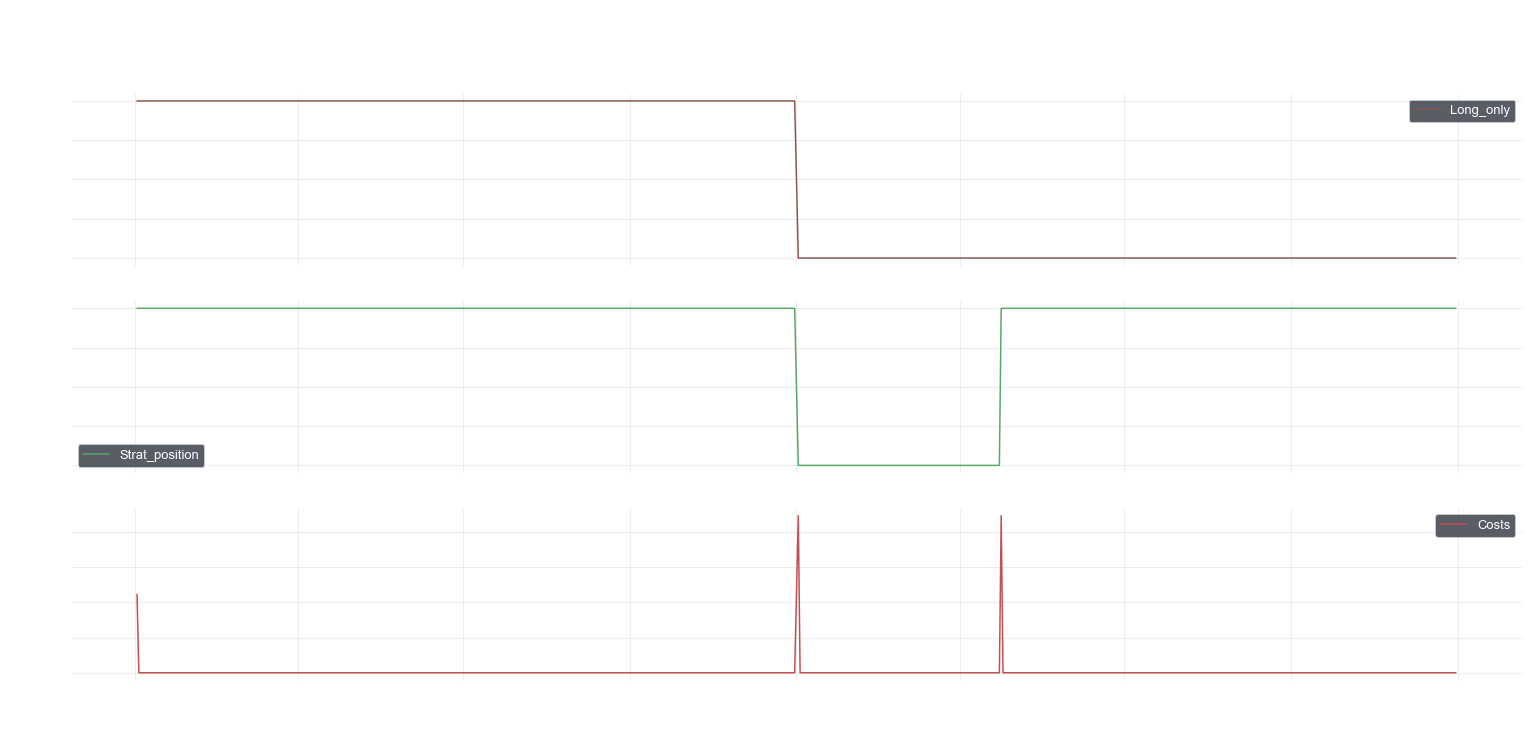

In [13]:
results_df = prepare_oos_df(df.loc[first_day:last_day].copy())

print("\tPeriod: {:%Y-%m-%d} to {:%Y-%m-%d}".format(results_df.index[0], results_df.index[-1]))
print("\tOverall return of SP500: {:.2f} %. SR of SP500: {:.2f}".format(results_df['Market_cum_ret'][-1], results_df['Market_daily_ret'].sharpe()))
print("\tOverall return of our strategy: {:.2f} %. Sharpe ratio strategy: {:.2f}".format(results_df['Strat_cum_ret'][-1], results_df['Strat_cum_ret'].sharpe()))

show_oos_plot(results_df)
cols = ['Long_only', 'Strat_position', 'Costs']
results_df[cols].plot(subplots=True, title='Strategy Postition and costs', color=('tab:brown', 'g', 'r'))

### Checking 'Strat_position' and 'Costs' of last days of year 1, and first days of year 2

In [14]:
last_day_2018 = results_df[str(first_day.year)].index[-1]
first_day_2019 = results_df[str(last_day.year)].index[0]
results_df.head(2)
results_df.loc[last_day_2018-one_day:first_day_2019+one_day]
results_df.loc['2019-04-22':'2019-04-25']

,Close,Market_daily_ret,Strat_daily_ret,Strat_position,Long_only,Costs,Market_cum_ret,Strat_cum_ret
Date,,,,,,,,
2018-01-02,2695.810059,0.008303,-0.000112,1,1,0.000112,100.830336,99.988846
2018-01-03,2713.060059,0.006399,0.006399,1,1,0.000000,101.475531,100.628657


,Close,Market_daily_ret,Strat_daily_ret,Strat_position,Long_only,Costs,Market_cum_ret,Strat_cum_ret
Date,,,,,,,,
2018-12-28,2485.739990,-0.001242,-0.001242,1,1,0.000000,92.973167,92.197250
2018-12-31,2506.850098,0.008492,0.008492,1,1,0.000000,93.762740,92.980234
2019-01-02,2510.030029,0.001268,0.001045,-1,0,0.000223,93.881678,93.077437
2019-01-03,2447.889893,-0.024757,0.024757,-1,0,0.000000,91.557475,95.381730


,Close,Market_daily_ret,Strat_daily_ret,Strat_position,Long_only,Costs,Market_cum_ret,Strat_cum_ret
Date,,,,,,,,
2019-04-22,2907.969971,0.001012,-0.001012,-1,0,0.000000,108.765671,79.946175
2019-04-23,2933.679932,0.008841,-0.008841,-1,0,0.000000,109.727291,79.239354
2019-04-24,2927.250000,-0.002192,0.001969,1,0,0.000223,109.486794,79.395352
2019-04-25,2926.169922,-0.000369,-0.000369,1,0,0.000000,109.446397,79.366057


## Walk forward optimization. 

###  Checking best combination is well picked according to the individual SR and the SR of its neighbors
    Robust SR = (Individual_SR + Neighbors_average_SR) / 2

In [15]:
fast_ma_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
slow_ma_list = [5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260]

IS_start_years = pd.date_range(start='2016-01-01', end='2019-01-01', freq='1YS', closed=None)
IS_end_years = pd.date_range(start='2018-12-31', end='2019-12-31', freq='1Y', closed=None)
OOS_start_years = pd.date_range(start='2019-01-01', end='2020-01-01', freq='1YS', closed=None)
OOS_end_years = pd.date_range(start='2019-12-31', end='2020-12-31', freq='1Y', closed=None)

print_periods(IS_start_years, IS_end_years, OOS_start_years, OOS_end_years)

num_neighbors_matrix = get_num_neighbors(fast_ma_list, slow_ma_list)

	In SAMPLE		OOS
2016-01-01 2018-12-31 	 2019-01-01 2019-12-31
2017-01-01 2019-12-31 	 2020-01-01 2020-12-31


Best In-sample performance:
Period: 2016-01-04 to 2018-12-31
	Overall return of SP500: 122.99 %. SR of SP500: 0.59
	Overall return of 25-220 MA crossover: 149.33 %. SR strategy: 1.10
OOS performance:
Period: 2019-01-02 to 2019-12-31
	Overall return of SP500: 130.43 %. SR of SP500: 2.10
	Overall return of 25-220 MA crossover: 103.56 %. SR strategy: 0.34

Best In-sample performance:
Period: 2017-01-03 to 2019-12-31
	Overall return of SP500: 143.49 %. SR of SP500: 1.02
	Overall return of long only: 143.49 %. SR strategy: 1.02
OOS performance:
Period: 2020-01-02 to 2020-05-22
	Overall return of SP500: 91.09 %. SR of SP500: -0.20
	Overall return of long only: 91.09 %. SR strategy: -0.20

End of Walk Forward Optimization


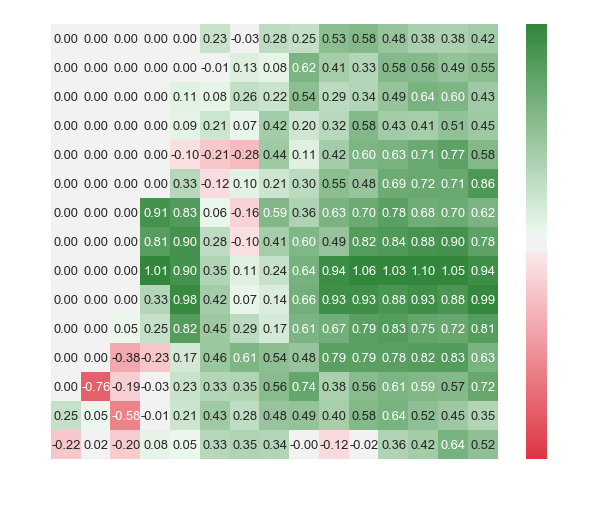

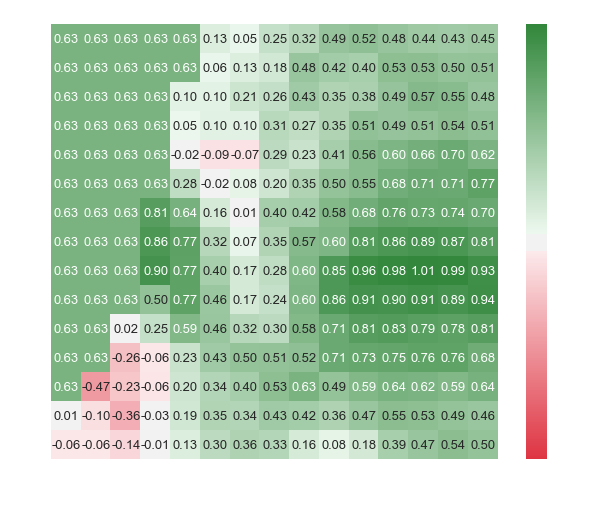

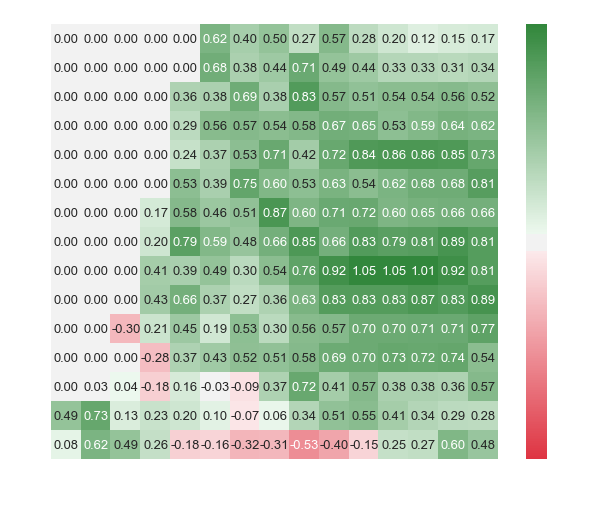

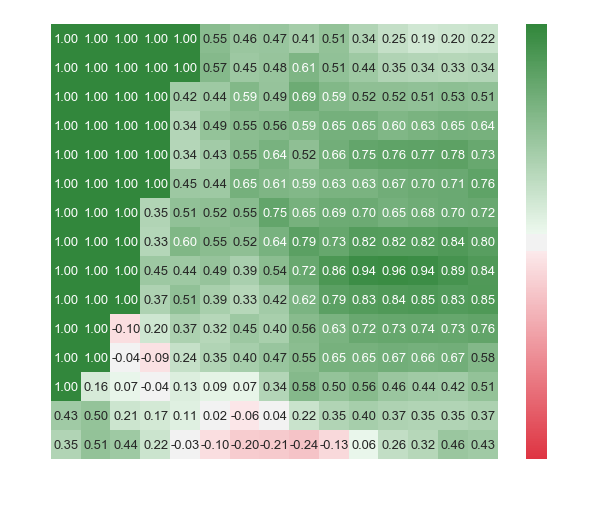

In [16]:
last_position = 0 # We suppose that we start not being invested. 1:long, -1:short

# Copy data and create necessary columns 
df = data[IS_start_years[0]:OOS_end_years[-1]].copy()
cols = ['Strat_daily_ret', 'Strat_position', 'Long_only', 'Costs', 'Market_cum_ret']
df = pd.concat([df, pd.DataFrame(columns=cols)])

for IS_start, IS_end, OOS_start, OOS_end in zip(IS_start_years, IS_end_years, OOS_start_years, OOS_end_years):
    results_sharpe = np.zeros((len(fast_ma_list),len(slow_ma_list)))
    results_pnl = np.zeros((len(fast_ma_list),len(slow_ma_list)))

    in_sample = df.loc[IS_start:IS_end].copy()
    oos_sample = df.loc[OOS_start:OOS_end].copy()
    
    ############################################ IN SAMPLE  ############################################
    results_pnl, results_sharpe, market_sharpe = run_all_combinations(in_sample, fast_ma_list, slow_ma_list)
    title = "Individual SR In Sample ("+str(IS_start.date())+":"+ str(IS_end.date()) +")"
    show_heatmap(results_sharpe, market_sharpe, plot_title=title, x_title="Slow MA", x_values=slow_ma_list, y_title="Fast MA", y_values=fast_ma_list)
    
    # Get index of maximum SR for the In-Sample period
    fast_index, slow_index, robust_results_sharpe = get_best_combination(market_sharpe, results_sharpe, num_neighbors_matrix, allow_long_only=True)
    title = "Robust SR In Sample ("+str(IS_start.date())+":"+ str(IS_end.date()) +")"
    show_heatmap(robust_results_sharpe, market_sharpe, plot_title=title, x_title="Slow MA", x_values=slow_ma_list, y_title="Fast MA", y_values=fast_ma_list)

    print("Best In-sample performance:")
    print_backtest_stats(in_sample, fast_ma_list[fast_index], slow_ma_list[slow_index], ret_strat=results_pnl[fast_index, slow_index], sr_strat=results_sharpe[fast_index, slow_index])
    
    ############################################ OUT OF SAMPLE  ############################################
    print("OOS performance:")
    _, pnl_sp, sharpe_sp = backtest_ma_strat(oos_sample, fast_ma=1, slow_ma=1, last_position=1) # Market- always long
    _, pnl, sharpe = backtest_ma_strat(oos_sample, fast_ma_list[fast_index], slow_ma_list[slow_index], last_position=last_position)
    
    print_backtest_stats(oos_sample, fast_ma_list[fast_index], slow_ma_list[slow_index], pnl, sharpe)  
    
    # Save come columns from OOS
    df.loc[OOS_start:OOS_end, cols] = oos_sample[cols]
    print()

print("End of Walk Forward Optimization")

,Close,Market_daily_ret,Strat_daily_ret,Strat_position,Long_only,Costs,Market_cum_ret,Strat_cum_ret
2019-01-02,2510.030029,0.001268,-0.000112,-1,0,0.000111538,100.126850,99.988846
2020-05-22,2955.449951,0.002354,0.002354,1,0,0,117.894961,93.936990


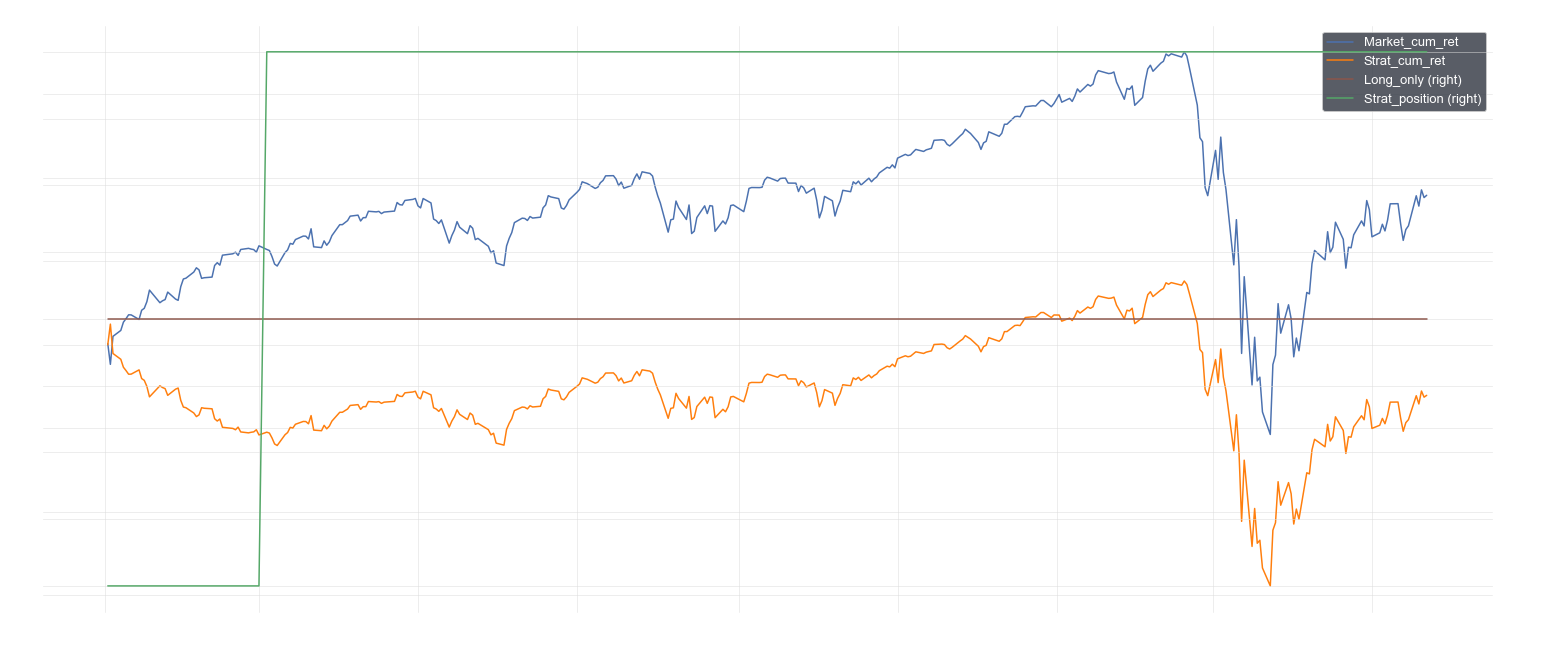

In [17]:
results_df = prepare_oos_df(df.loc[OOS_start_years[0]:OOS_end_years[-1]].copy())
results_df.iloc[[0,-1]]
show_oos_plot(results_df)

In [18]:
results_df.head(1)

,Close,Market_daily_ret,Strat_daily_ret,Strat_position,Long_only,Costs,Market_cum_ret,Strat_cum_ret
2019-01-02,2510.030029,0.001268,-0.000112,-1,0,0.000111538,100.12685,99.988846


In [19]:
#save_report(full_df.loc['1973':'1982', 'Market_daily_ret'], benchmark=full_df.loc['1973':'1982', 'Close'])
#save_report(full_df.loc['1983':'1999', 'Market_daily_ret'], benchmark=full_df.loc['1983':'1999', 'Close'])
#save_report(full_df.loc['2000':'2002', 'Market_daily_ret'], benchmark=full_df.loc['2000':'2002', 'Close'])
#save_report(full_df.loc['2003':'2020', 'Market_daily_ret'], benchmark=full_df.loc['2003':'2020', 'Close'])


## Analysis of Shorting periods

In [20]:
results_df = pd.read_csv("Strategy returns.csv", parse_dates=True, index_col=0)
results_df.head(1)

,Close,Market_daily_ret,Strat_daily_ret,Strat_position,Long_only,Costs,Market_cum_ret,Strat_cum_ret
1973-01-02,119.099998,0.008894,-0.000112,1,0,0.000112,100.88945,99.988846


### Distribution of returns of buying vs shorting the market

In [24]:
highest = max(np.abs(results_df['Market_daily_ret'].min()), results_df['Market_daily_ret'].max()).round(2)
lowest = -highest
bins = np.arange(lowest, highest, 0.01)
bins.round(3)

array([-0.2 , -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11, -0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,  0.19])

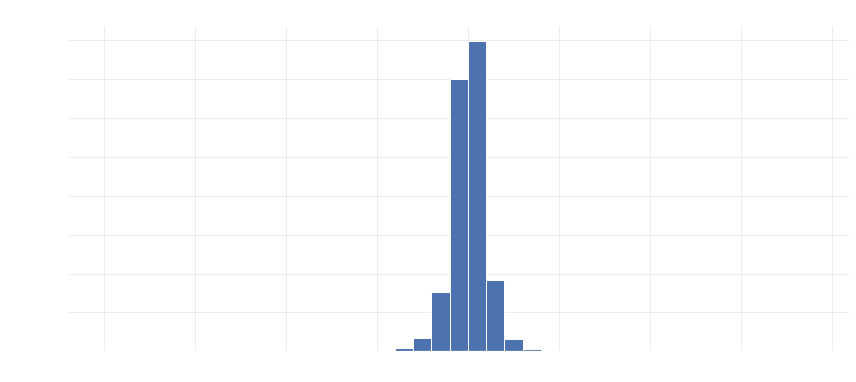

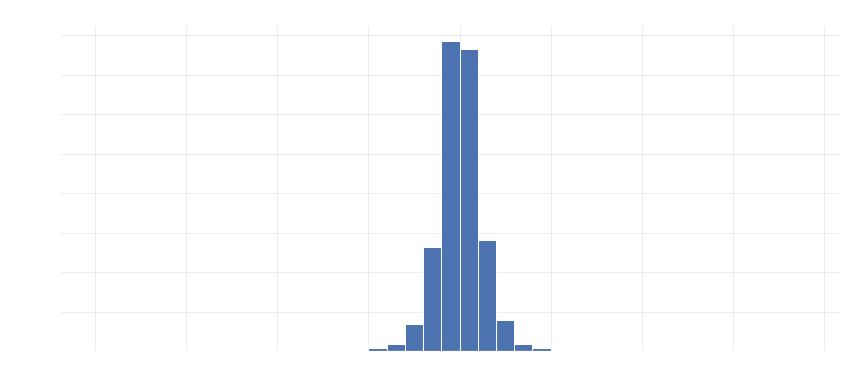

In [25]:
groups = results_df.groupby('Strat_position')
groups.get_group(1)['Strat_daily_ret'].plot(kind='hist', bins=bins, figsize=(14,6), title="Strat_daily_ret when buying the market (Strat_position=1)")
plt.show()
groups.get_group(-1)['Strat_daily_ret'].plot(kind='hist', bins=bins, figsize=(14,6), title="Strat_daily_ret when shorting the market (Strat_position=-1)")

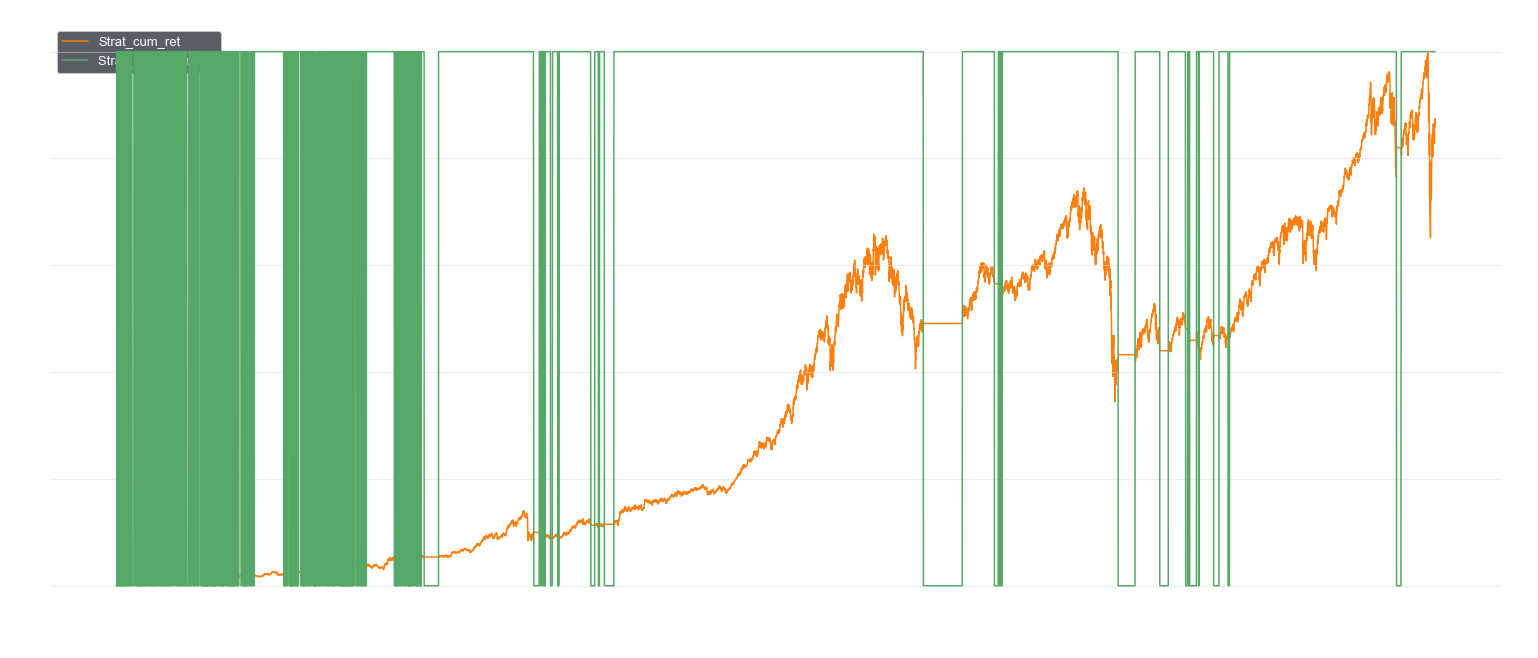

In [26]:
ini_equity = 100
df_short = results_df.loc[: ,['Close', 'Market_daily_ret', 'Strat_position', 'Costs']].copy()
df_short['Strat_position'].replace({-1:0}, inplace=True)
df_short['Costs'] = df_short['Costs'].div(2) 

first_day = str(df_short.index.min())


df_short['Strat_daily_ret'] = df_short['Market_daily_ret'].mul(df_short['Strat_position'].shift(1).fillna(0)).sub(df_short['Costs'])

df_short['Market_cum_ret'] = df_short['Market_daily_ret'].add(1).cumprod().mul(ini_equity)
df_short['Strat_cum_ret'] = df_short['Strat_daily_ret'].add(1).cumprod().mul(ini_equity)
df_short.loc[first_day, 'Market_cum_ret'] = ini_equity + df_short.loc[first_day, 'Market_daily_ret'] * ini_equity
df_short.loc[first_day, 'Strat_cum_ret'] = ini_equity + df_short.loc[first_day,'Strat_daily_ret'] * ini_equity

#df_short['1976-06-22':'1976-06']
df_short[['Strat_cum_ret', 'Strat_position']].plot(secondary_y=['Strat_position'], title='Strategy Postition and costs', color=['tab:orange', 'g'])

### Returns when shorting the market

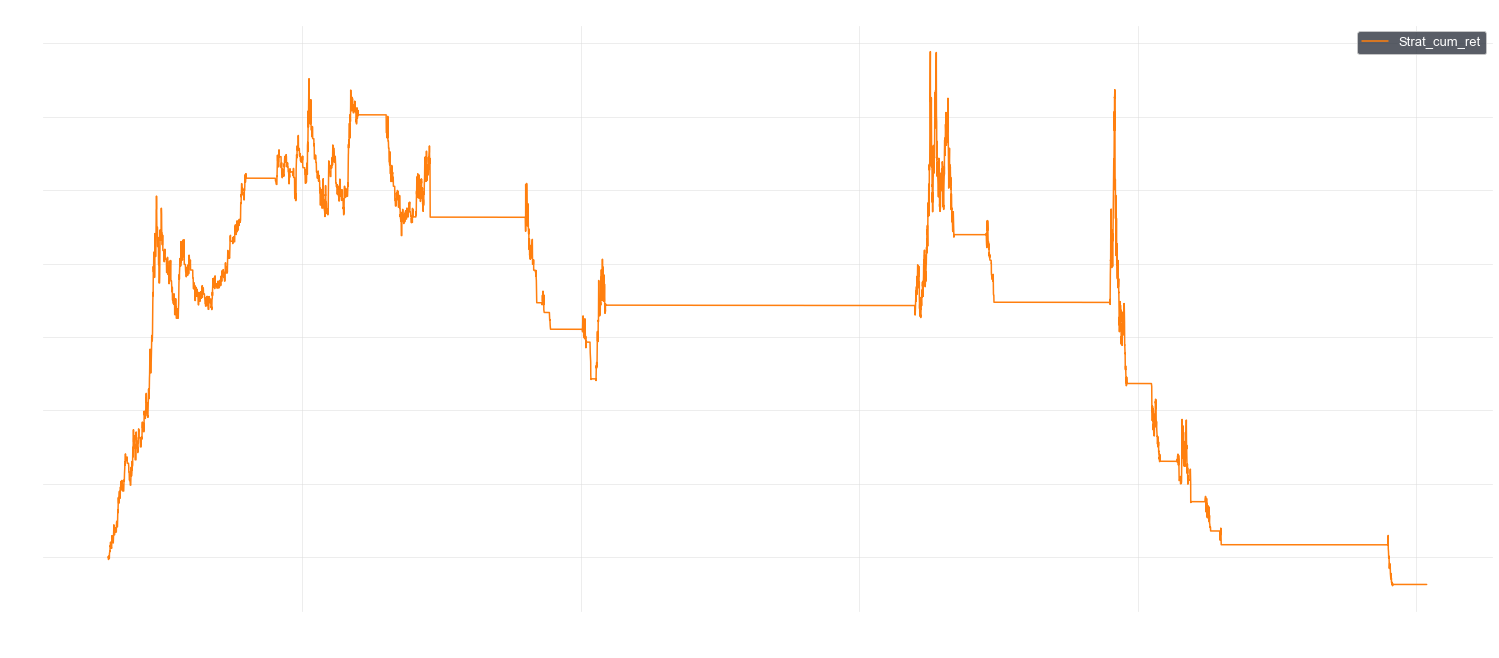

In [27]:
df_short = results_df.loc[: ,['Market_daily_ret', 'Strat_daily_ret', 'Strat_position', 'Market_cum_ret']].copy()
ini_equity = 100
first_day = str(df_short.index.min())

df_short = results_df.loc[: ,['Close', 'Market_daily_ret', 'Strat_position', 'Costs']].copy()
df_short['Strat_position'].replace({1:0}, inplace=True)
df_short['Costs'] = df_short['Costs'].div(2) 

df_short['Strat_daily_ret'] = df_short['Market_daily_ret'].mul(df_short['Strat_position'].shift(1).fillna(0)).sub(df_short['Costs'])

df_short['Market_cum_ret'] = df_short['Market_daily_ret'].add(1).cumprod().mul(ini_equity)
df_short['Strat_cum_ret'] = df_short['Strat_daily_ret'].add(1).cumprod().mul(ini_equity)
df_short.loc[first_day, 'Market_cum_ret'] = ini_equity + df_short.loc[first_day, 'Market_daily_ret'] * ini_equity
df_short.loc[first_day, 'Strat_cum_ret'] = ini_equity + df_short.loc[first_day,'Strat_daily_ret'] * ini_equity

#df_short[['Strat_cum_ret', 'Strat_position']].plot(subplots=['Strat_position'], title='Strategy Postition and costs', color=['tab:orange', 'g'])
df_short[['Strat_cum_ret']].plot(title='Strategy Postition = -1', color=['tab:orange'])

### Conclusions

- Shorting the market only works in the period 1973-1983. Year 2002 also delivers very good results. I don´t think it makes sense to keep this (increase of volatility, and no additional profits)
- This explains the results of the whole backtest:
    - Overperforming the benchmark in 1973-1983 and 2002.
    - (Mostly) Equal, or underperforming the rest of the years